<a href="https://colab.research.google.com/github/MuhammadFadhilArkan/Techtest/blob/main/Q1/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from datetime import datetime, date
from sklearn import preprocessing
import tensorflow as tf
import time
import keras.backend as K
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
pd.options.mode.chained_assignment = None

from sklearn import metrics

Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CAD IT/Machine Learning Application Engineer Test 2021 V1.1/Q1.csv")
df

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,3/10/2018 0:00,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,3/10/2018 0:00,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,3/10/2018 0:00,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,3/10/2018 0:00,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0
...,...,...,...,...,...,...,...,...,...,...
13842,10/17/2018 15:31,39.781958,39.366774,35.699109,34.977640,1.487568,1.888282,1.005966,1.792363,1
13843,10/17/2018 15:32,39.628272,39.461169,35.665838,35.052602,1.489291,1.752119,1.001954,1.742410,1
13844,10/17/2018 15:32,39.612208,39.890494,35.971746,34.636423,1.482300,1.850078,1.018153,1.804849,1
13845,10/17/2018 15:45,39.822699,39.725013,35.558900,34.845422,1.528402,1.937668,0.818741,1.351930,1


Check dataset column information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13847 entries, 0 to 13846
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         13847 non-null  object 
 1   CHP1Temp1(Deg C)  13847 non-null  float64
 2   CHP1Temp2(Deg C)  13847 non-null  float64
 3   CHP2Temp1(Deg C)  13847 non-null  float64
 4   CHP2Temp2(Deg C)  13847 non-null  float64
 5   CHP1Vib1(mm/s)    13847 non-null  float64
 6   CHP1Vib2(mm/s)    13847 non-null  float64
 7   CHP2Vib1(mm/s)    13847 non-null  float64
 8   CHP2Vib2(mm/s)    13847 non-null  float64
 9   Fault             13847 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


Check data distribution

In [ ]:
df.describe()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
count,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000
mean,38.894831,38.372753,37.049863,37.083295,0.998612,1.345662,0.934057,1.763645,0.393082
std,1.657766,1.818556,2.927990,3.476318,0.616521,0.853053,0.619965,1.268073,0.488452
min,34.272883,33.652465,31.602933,31.247236,0.046510,0.045864,0.068607,0.082864,0.000000
25%,38.336334,37.233618,35.394773,34.523069,0.070278,0.067707,0.091273,0.108075,0.000000
50%,39.569812,39.364623,38.227170,37.395959,1.322656,1.778066,0.935697,1.670248,0.000000
75%,39.970923,39.671286,39.413810,40.465354,1.473305,1.967611,1.525421,2.952790,1.000000
max,41.325293,40.638881,43.187444,41.962697,1.610700,2.390570,1.785126,3.950299,1.000000


Check for missing value

In [ ]:
df.isnull().sum()

Timestamp           0
CHP1Temp1(Deg C)    0
CHP1Temp2(Deg C)    0
CHP2Temp1(Deg C)    0
CHP2Temp2(Deg C)    0
CHP1Vib1(mm/s)      0
CHP1Vib2(mm/s)      0
CHP2Vib1(mm/s)      0
CHP2Vib2(mm/s)      0
Fault               0
dtype: int64

In [ ]:
columns =df.columns

As we can see, the value of temperature is much higher than vibration, So we need to normalize the data

In [ ]:
#Normalize Data
X_Scaler = MinMaxScaler()
df[columns[1:-1]] = X_Scaler.fit_transform(df[columns[1:-1]])

df

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,0.722877,0.713565,0.797934,0.796568,0.009108,0.008647,0.011283,0.003751,0
1,3/10/2018 0:00,0.725672,0.715506,0.801163,0.798699,0.015237,0.008062,0.014912,0.007505,0
2,3/10/2018 0:00,0.727433,0.716689,0.804793,0.799796,0.004196,0.003113,0.010089,0.001520,0
3,3/10/2018 0:00,0.729852,0.719244,0.808322,0.801865,0.008589,0.006764,0.011781,0.004583,0
4,3/10/2018 0:00,0.731331,0.719339,0.811866,0.802807,0.016362,0.006288,0.011960,0.006096,0
...,...,...,...,...,...,...,...,...,...,...
13842,10/17/2018 15:31,0.781162,0.817917,0.353591,0.348133,0.921281,0.785778,0.546081,0.442024,1
13843,10/17/2018 15:32,0.759370,0.831428,0.350719,0.355129,0.922382,0.727705,0.543744,0.429108,1
13844,10/17/2018 15:32,0.757092,0.892880,0.377125,0.316289,0.917913,0.769484,0.553181,0.445252,1
13845,10/17/2018 15:45,0.786939,0.869194,0.341488,0.335794,0.947386,0.806841,0.437009,0.328142,1


Check the label distribution

In [ ]:
print(f"Value counts for each class:\n\n{df.Fault.value_counts()}\n")

Value counts for each class:

0    8404
1    5443
Name: Fault, dtype: int64



As we can see, this is an unbalanced dataset, so we need to do the train_test split correctly, and use f1 score for the metrics

Create the model

In [ ]:
def create_model():
    tf.keras.backend.clear_session()
    tf.random.set_seed(49)
    np.random.seed(49)

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256,input_shape=[8], activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

    model.summary()
    return model

Create dataset pipeline

In [ ]:
y = df[columns[-1]]
y = np.asarray(y).astype('float32')
y = y.reshape(-1,1)
X = df[columns[1:-1]].values
X = np.asarray(X).astype('float32')

Split the data using stratify to balanced the split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
batch_size = 100
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(X_train.shape[0]).batch(batch_size)
val_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_data = val_data.batch(batch_size)

Train the model using learning rate scheduler so that we can use the best learning rate later

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=0.5),
          ]

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 100))

optimizer = tf.keras.optimizers.Adam(lr=1e-8, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model = create_model()

model.compile(optimizer=optimizer,                                                   
                loss=tf.keras.losses.Huber(),
                metrics=METRICS)

history = model.fit(train_data,batch_size=100,
                      epochs=500,validation_data=val_data, callbacks=[lr_schedule])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
111/111 [==============================] - 2s 5ms/step - loss: 0.2063 - accuracy: 0.6069 - val_loss: 0.2062 - val_accuracy: 0.6069 - lr: 1.0000e-08
Epoch 2/500
111/111 [===

(0.0, 0.3)

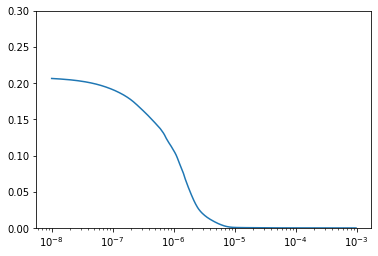

In [ ]:
lr_param = history.history["lr"]
loss_param = history.history["loss"]

plt.semilogx(lr_param, loss_param)
#plt.xlim(1e-8, 1e-1)
plt.ylim(0,.3)

from the graph, we can see that learning rate 1e-5 is pretty good, so we gonna use it to train the model

In [ ]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=0.5),
          ]

optimizer = tf.keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model = create_model()

model.compile(optimizer=optimizer,                                                   
                loss=tf.keras.losses.Huber(),
                metrics=METRICS)

history = model.fit(train_data,batch_size=100,
                      epochs=100,validation_data=val_data)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
111/111 [==============================] - 1s 5ms/step - loss: 0.1884 - accuracy: 0.6069 - val_loss: 0.1729 - val_accuracy: 0.6069
Epoch 2/100
111/111 [====================

Visualize the result!

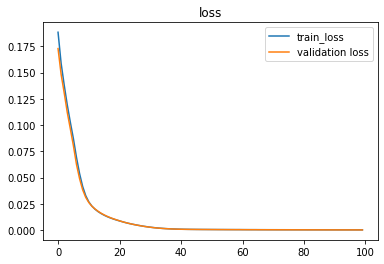

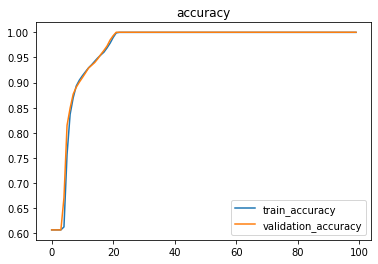

In [ ]:
epoch_param = history.epoch
loss_param = history.history["loss"]
val_loss_param = history.history["val_loss"]
acc_param = history.history["accuracy"]
val_acc_param = history.history["val_accuracy"]


plt.plot(epoch_param, loss_param,label = "train_loss")
plt.plot(epoch_param, val_loss_param, label ="validation loss")
plt.legend()
plt.title("loss")
plt.show()


plt.plot(epoch_param, acc_param, label = "train_accuracy")
plt.plot(epoch_param, val_acc_param, label = "validation_accuracy")
plt.title("accuracy")
plt.legend()
plt.show()

We see that the model has converged perfectly!

As we know, the dataset is unbalanced. So we need to evaluate the performance based on f1 score

In [ ]:
def compute_metrics(X,y):
  y_pred = model.predict(X)
  y_pred = y_pred >= 0.5
  y_pred = y_pred.astype('int')
  cm = confusion_matrix(y, y_pred)

  print("accuracy:", accuracy_score(y, y_pred))
  print("precision:", precision_score(y, y_pred))
  print("recall:", recall_score(y, y_pred))
  print("f1 score:", f1_score(y, y_pred))
  print("True Positive:", cm[1][1])
  print("True Negative:", cm[0][0])
  print("False Positive:", cm[0][1])
  print("False Negative:", cm[1][0])

In [ ]:
compute_metrics(X_train,y_train)

accuracy: 0.9997291685474406
precision: 1.0
recall: 0.9993109784106569
f1 score: 0.9996553704767375
True Positive: 4351
True Negative: 6723
False Positive: 0
False Negative: 3


In [ ]:
compute_metrics(X_test,y_test)

accuracy: 1.0
precision: 1.0
recall: 1.0
f1 score: 1.0
True Positive: 1089
True Negative: 1681
False Positive: 0
False Negative: 0


Yeay! our model has an amazing performance. The f1 score is more than 0.999 for both train and test data.
We can conclude that our model can predict with great accuracy and able to generalize as well.

Finally, Save the model and the scaler

In [ ]:
model.save("/content/drive/MyDrive/CAD IT/Q1.h5")

In [ ]:
from pickle import dump
dump(X_Scaler, open('/content/drive/MyDrive/CAD IT/scaler.pkl', 'wb'))